In [28]:
import pandas as pd

# Load dataset
df = pd.read_csv("movies_metadata.csv", low_memory=False)

# Convert budget and revenue to numeric
df["budget"] = pd.to_numeric(df["budget"], errors="coerce")
df["revenue"] = pd.to_numeric(df["revenue"], errors="coerce")

# Remove movies with missing or zero budget/revenue
df = df[(df["budget"] > 0) & (df["revenue"] > 0)]

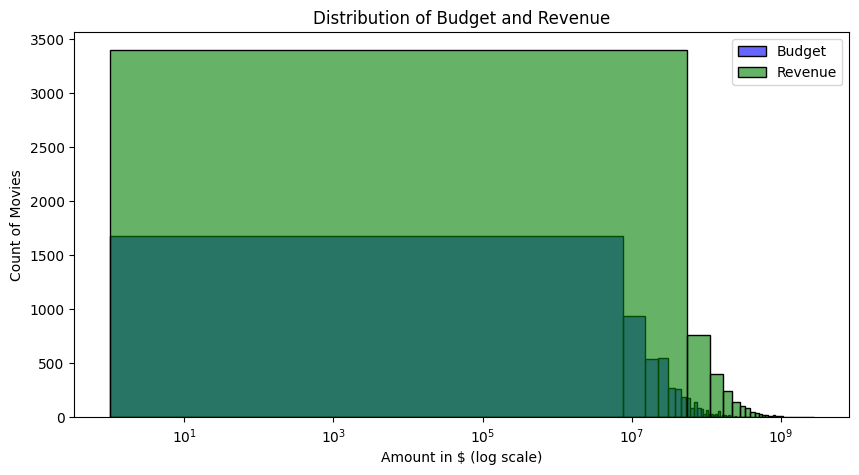

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(df["budget"], bins=50, color="blue", alpha=0.6, label="Budget")
sns.histplot(df["revenue"], bins=50, color="green", alpha=0.6, label="Revenue")
plt.xscale("log")
plt.xlabel("Amount in $ (log scale)")
plt.ylabel("Count of Movies")
plt.title("Distribution of Budget and Revenue")
plt.legend()
plt.show()

In [30]:
# Create binary target variable
df["success"] = df["revenue"] > (2 * df["budget"])
df["success"] = df["success"].astype(int)  # Convert to 0 (flop) / 1 (hit)

In [31]:
# Selecting useful columns
features = ["budget", "popularity", "runtime", "vote_count", "vote_average"]
df = df[features + ["success"]].dropna()  # Drop rows with missing values

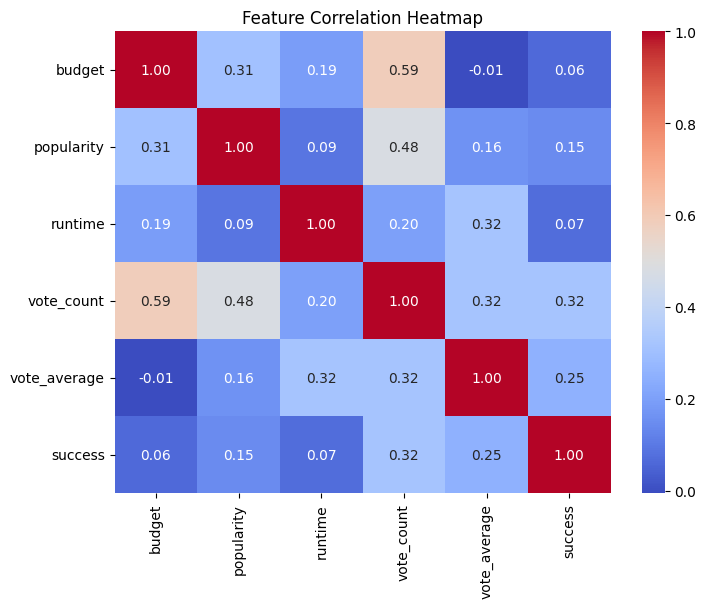

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[["budget", "popularity", "runtime", "vote_count", "vote_average"]] = scaler.fit_transform(
    df[["budget", "popularity", "runtime", "vote_count", "vote_average"]]
)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split data
X = df[features]
y = df["success"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6737918215613383
              precision    recall  f1-score   support

           0       0.65      0.70      0.67       522
           1       0.69      0.65      0.67       554

    accuracy                           0.67      1076
   macro avg       0.67      0.67      0.67      1076
weighted avg       0.68      0.67      0.67      1076



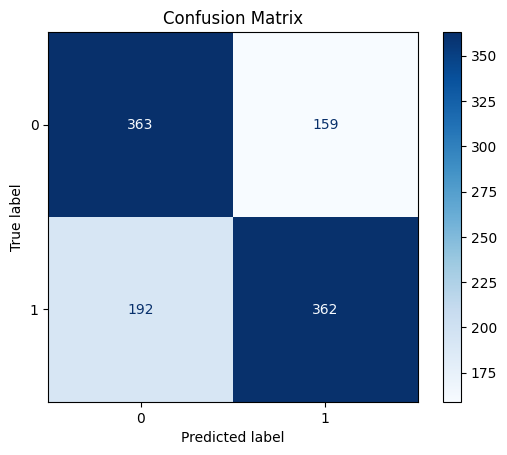

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()